In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/pp_scattering_probabilities.csv")

In [9]:
assert np.all(df["P_el"] >= 0)
assert np.all(df["P_el"] <= 1)
assert np.all(df["delta_P_el"] > 0)

In [11]:
P_el_mean = np.average(
    df["P_el"],
    weights=1.0 / df["delta_P_el"]**2
)

df["P_el_const"] = P_el_mean

In [13]:
weights = 1.0 / df["delta_P_el"]

coeffs_lin = np.polyfit(
    df["E_MeV"],
    df["P_el"],
    deg=1,
    w=weights
)

df["P_el_linear"] = np.polyval(coeffs_lin, df["E_MeV"])
coeffs_lin

array([-0.00509086,  2.35096745])

In [14]:
if len(df) >= 3:
    coeffs_quad = np.polyfit(
        df["E_MeV"],
        df["P_el"],
        deg=2,
        w=weights
    )
    df["P_el_quad"] = np.polyval(coeffs_quad, df["E_MeV"])

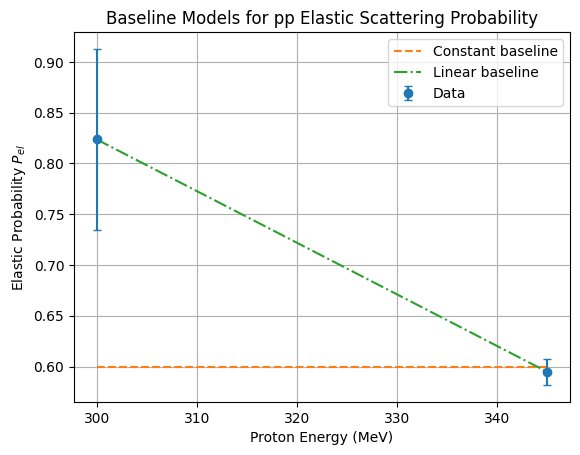

In [15]:
plt.errorbar(
    df["E_MeV"],
    df["P_el"],
    yerr=df["delta_P_el"],
    fmt="o",
    capsize=3,
    label="Data"
)

plt.plot(
    df["E_MeV"],
    df["P_el_const"],
    "--",
    label="Constant baseline"
)

plt.plot(
    df["E_MeV"],
    df["P_el_linear"],
    "-.",
    label="Linear baseline"
)

if "P_el_quad" in df.columns:
    plt.plot(
        df["E_MeV"],
        df["P_el_quad"],
        "-",
        label="Quadratic baseline"
    )

plt.xlabel("Proton Energy (MeV)")
plt.ylabel("Elastic Probability $P_{el}$")
plt.title("Baseline Models for pp Elastic Scattering Probability")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
df.to_csv(
    "../data/processed/pp_baseline_predictions.csv",
    index=False
)